<a href="https://colab.research.google.com/github/LucianoPer/VPC2/blob/main/5_VPC2_Dataset_y_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [3]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:00, 195MB/s] 


In [4]:
!unzip /content/perros_y_gatos.zip > /dev/null

replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [6]:
cd /content

/content


In [7]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

In [8]:
train_dir

'./train'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [10]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
train_datagen

In [12]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#   i += 1
#   print(i)
#   if i > 4:
#     break



In [13]:
# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 4:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [14]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [16]:
model = models.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
# conv -> input(150x150x3) filtros 32 3x3 --> output = 150-3/1  +1 =  148x148x32
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 148x148x32 pool 2x2  strides 2 --> output =  148 - 2 /2  +1 = 74x74x32
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', ))
# conv -> input(74x74x32) filtros 64 3x3 --> output = 74-3/1  +1 =  72x72x64
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 72x72x64 pool 2x2  strides 2 --> output =  72 - 2 /2  +1 = 36x36x64
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', ))
# conv -> input(36x36x64) filtros 128 3x3 --> output = 36-3/1  +1 =  34x34x128
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 34x34x128 pool 2x2  strides 2 --> output =  34 - 2 /2  +1 = 17x17x128
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 17x17x128 pool 2x2  strides 2 --> output =  17 - 2 /2  +1 = 8x8x128
model.add(keras.layers.Flatten())
# flatten 8x8x128 = 8192
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0

In [18]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 96s 963ms/step - loss: 0.6843 - acc: 0.5540 - val_loss: 0.6782 - val_acc: 0.5550
Epoch 2/5
100/100 [==============================] - 96s 957ms/step - loss: 0.6366 - acc: 0.6565 - val_loss: 0.6431 - val_acc: 0.6060
Epoch 3/5
100/100 [==============================] - 98s 985ms/step - loss: 0.6011 - acc: 0.6925 - val_loss: 0.6061 - val_acc: 0.6840
Epoch 4/5
100/100 [==============================] - 96s 964ms/step - loss: 0.5543 - acc: 0.7160 - val_loss: 0.5773 - val_acc: 0.7030
Epoch 5/5
100/100 [==============================] - 97s 967ms/step - loss: 0.5271 - acc: 0.7420 - val_loss: 0.5939 - val_acc: 0.6850


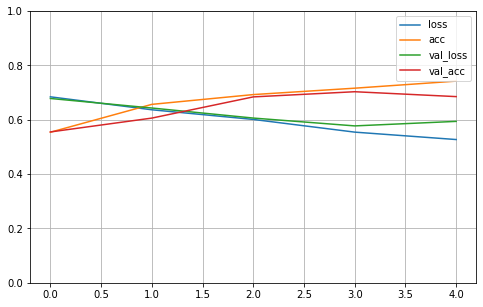

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range = 0.3,
    rotation_range= 0.1,
    shear_range = 0.2,
    horizontal_flip = True, 
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [29]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob(".\*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [38]:
model2 = models.Sequential()
model2.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
# conv -> input(150x150x3) filtros 32 3x3 --> output = 150-3/1  +1 =  148x148x32
model2.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 148x148x32 pool 2x2  strides 2 --> output =  148 - 2 /2  +1 = 74x74x32
model2.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', ))
# conv -> input(74x74x32) filtros 64 3x3 --> output = 74-3/1  +1 =  72x72x64
model2.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 72x72x64 pool 2x2  strides 2 --> output =  72 - 2 /2  +1 = 36x36x64
model2.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', ))
# conv -> input(36x36x64) filtros 128 3x3 --> output = 36-3/1  +1 =  34x34x128
model2.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 34x34x128 pool 2x2  strides 2 --> output =  34 - 2 /2  +1 = 17x17x128
model2.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# Pooling -> input 17x17x128 pool 2x2  strides 2 --> output =  17 - 2 /2  +1 = 8x8x128
model2.add(keras.layers.Flatten())
# flatten 8x8x128 = 8192
model2.add(keras.layers.Dense(512, activation="relu"))
model2.add(keras.layers.Dense(1, activation="sigmoid"))
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [39]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=11,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/11
100/100 [==============================] - 103s 1s/step - loss: 0.6894 - acc: 0.5495 - val_loss: 0.6755 - val_acc: 0.5820
Epoch 2/11
100/100 [==============================] - 103s 1s/step - loss: 0.6659 - acc: 0.5885 - val_loss: 0.6433 - val_acc: 0.6210
Epoch 3/11
100/100 [==============================] - 107s 1s/step - loss: 0.6365 - acc: 0.6475 - val_loss: 0.6977 - val_acc: 0.5590
Epoch 4/11
100/100 [==============================] - 103s 1s/step - loss: 0.6265 - acc: 0.6520 - val_loss: 0.6088 - val_acc: 0.6790
Epoch 5/11
100/100 [==============================] - 103s 1s/step - loss: 0.6002 - acc: 0.6745 - val_loss: 0.5968 - val_acc: 0.6850
Epoch 6/11
100/100 [==============================] - 103s 1s/step - loss: 0.5764 - acc: 0.7010 - val_loss: 0.6516 - val_acc: 0.6310
Epoch 7/11
100/100 [==============================] - 103s 1s/step - loss: 0.5634 - acc: 0.7200 - val_loss: 0.5620 - val_acc: 0.7110
Epoch 8/11
100/100 [==============================] - 103s 1s/step - 

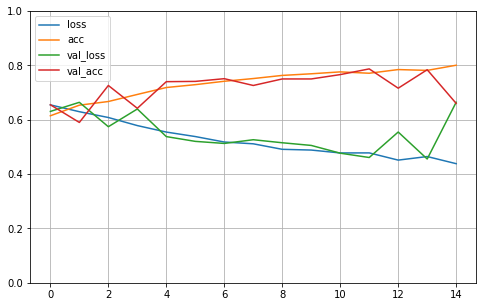

In [37]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
keras.backend.clear_session
del model2